In [704]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [705]:
colors = ["#d63390", "#d65133", "#d6a233", "#33d651", "#3366d6", "#a233d6"]
data = './output/results.csv'
data_new = './output/results_new.csv'

In [706]:
df = pd.read_csv(data).reset_index(drop=True)

data_050e_single = df.loc[df['id'] == '050:001'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data_100e_single = df.loc[df['id'] == '100:001'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data_200e_single = df.loc[df['id'] == '200:001'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data_300e_single = df.loc[df['id'] == '300:001'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data_400e_single = df.loc[df['id'] == '400:005'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data_500e_single = df.loc[df['id'] == '500:005'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]

data_050e_all_max = df.loc[df['id'].str.startswith('050:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data_100e_all_max = df.loc[df['id'].str.startswith('100:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data_200e_all_max = df.loc[df['id'].str.startswith('200:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data_300e_all_max = df.loc[df['id'].str.startswith('300:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data_400e_all_max = df.loc[df['id'].str.startswith('400:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data_500e_all_max = df.loc[df['id'].str.startswith('500:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']

data_050e_last_max = list(df.loc[df['id'].str.startswith('050:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data_100e_last_max = list(df.loc[df['id'].str.startswith('100:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data_200e_last_max = list(df.loc[df['id'].str.startswith('200:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data_300e_last_max = list(df.loc[df['id'].str.startswith('300:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data_400e_last_max = list(df.loc[df['id'].str.startswith('400:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data_500e_last_max = list(df.loc[df['id'].str.startswith('500:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])


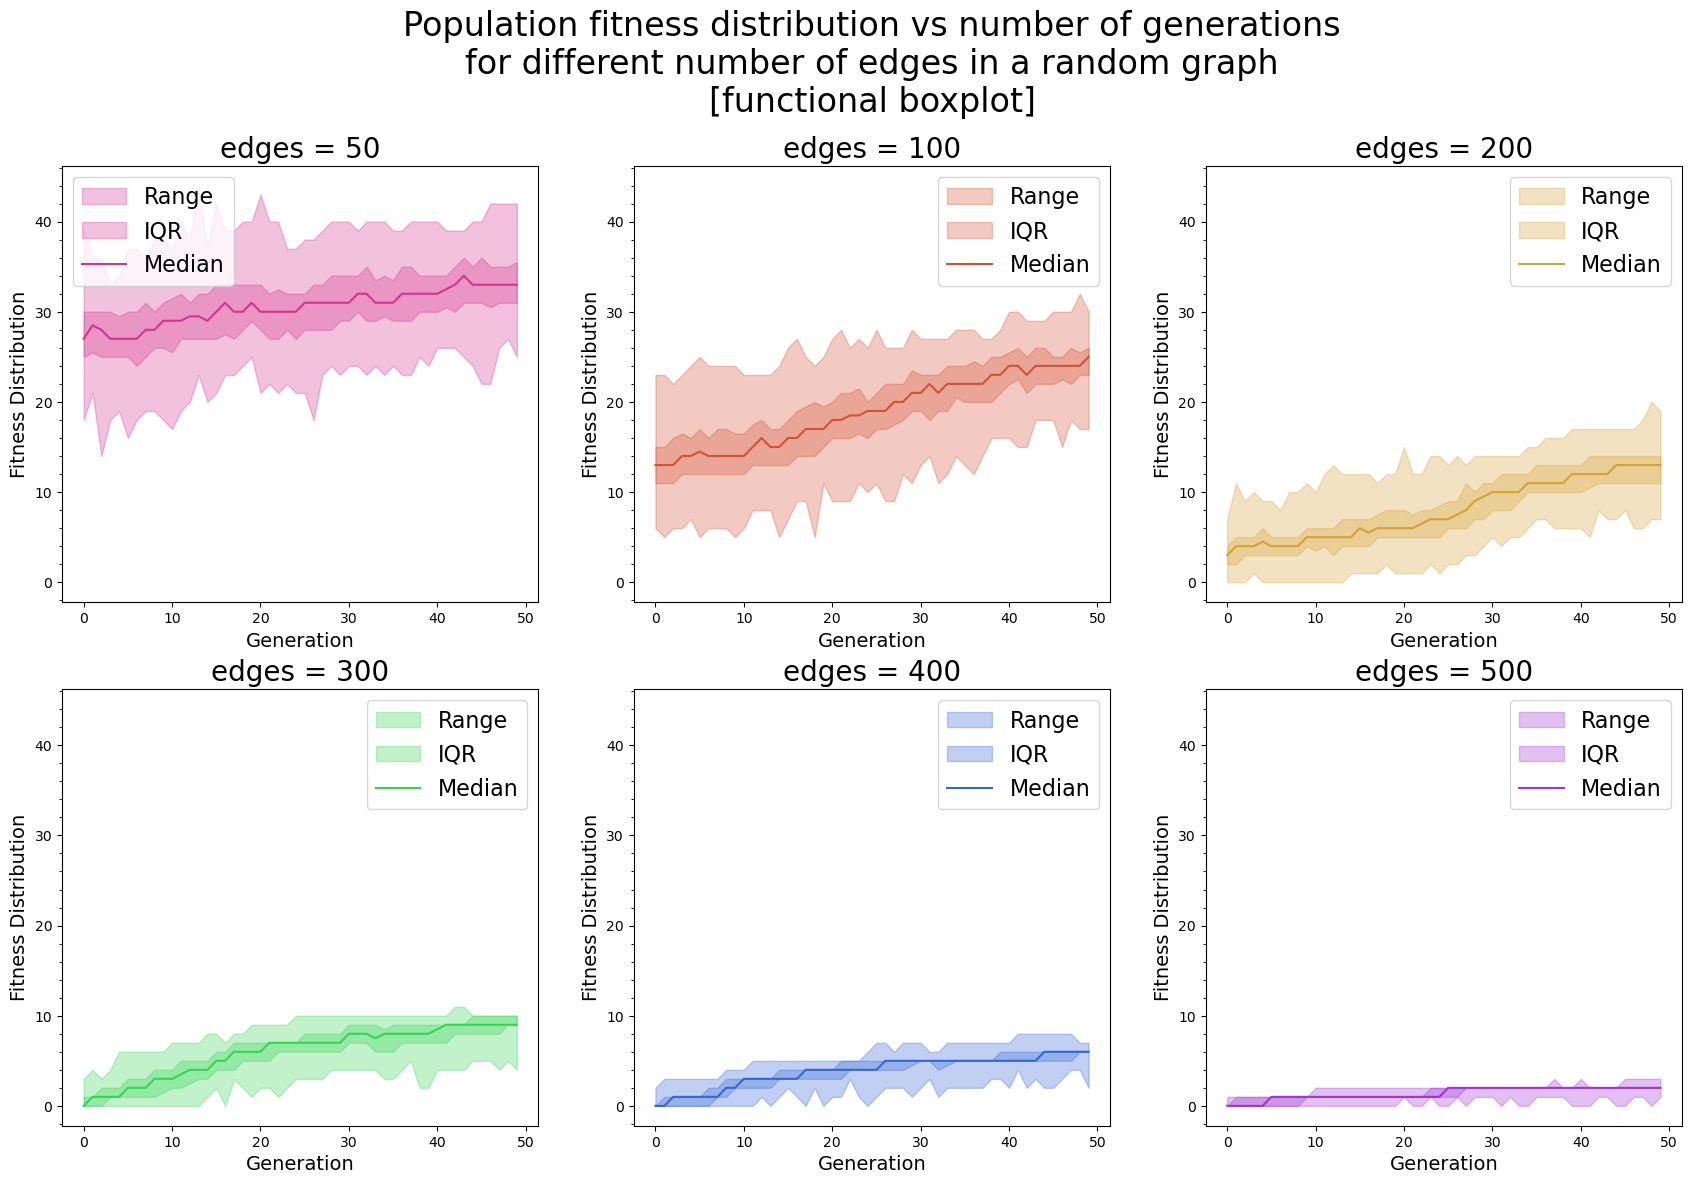

In [707]:
def plot_fbox(ax, data, color=colors[0], edges=0):
    ax.set_title(f"edges = {edges}", fontsize=20)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.yaxis.set_tick_params(which='both', labelbottom=True)
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    ax.set_xlabel("Generation", fontsize=14)
    ax.set_ylabel("Fitness Distribution", fontsize=14)
    ax.fill_between(data['generation'], data['fitness.min'], data['fitness.max'], color=color, alpha=0.3, label="Range")
    ax.fill_between(data['generation'], data['fitness.l_quartile'], data['fitness.u_quartile'], color=color, alpha=0.3, label="IQR")
    ax.plot(data['generation'], data['fitness.median'], color=color, label=f"Median")
    ax.legend(fontsize=16)

fig1, axs1 = plt.subplots(2,3, sharey=True, sharex=True)
fig1.set_size_inches(18, 12)
fig1.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05)
fig1.suptitle("Population fitness distribution vs number of generations\nfor different number of edges in a random graph\n[functional boxplot]", fontsize=24)
plot_fbox(axs1[0, 0], data_050e_single, color=colors[0], edges=50)
plot_fbox(axs1[0, 1], data_100e_single, color=colors[1], edges=100)
plot_fbox(axs1[0, 2], data_200e_single, color=colors[2], edges=200)
plot_fbox(axs1[1, 0], data_300e_single, color=colors[3], edges=300)
plot_fbox(axs1[1, 1], data_400e_single, color=colors[4], edges=400)
plot_fbox(axs1[1, 2], data_500e_single, color=colors[5], edges=500)
fig1.savefig('plots/01.png')
fig1.show()




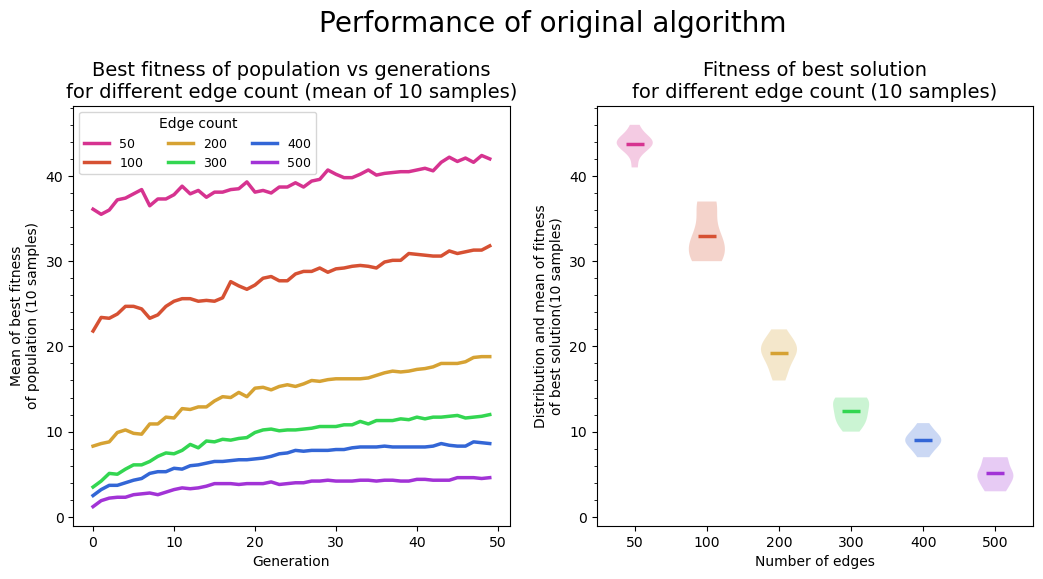

In [708]:
def plot_lines(ax, data, color=colors[0], edges=0):
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.yaxis.set_tick_params(which='both', labelbottom=True)
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    ax.plot(data, color=color, label=edges, linewidth=2.5)

def plot_violin(ax, data, compare=False):
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.yaxis.set_tick_params(which='both', labelbottom=True)
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    plots = ax.violinplot(data, showextrema=False, showmeans=True)
    for i, p in enumerate(plots['bodies']):
        p.set_facecolor(f"{colors[i]}")
        p.set_alpha(0 if compare else 0.25)
    plots['cmeans'].set_colors(colors)
    plots['cmeans'].set_linewidth(2.5)
    if compare:
        plots['cmeans'].set_alpha(0.8)
        plots['cmeans'].set_linestyle('dotted')


fig2, (ax2_0, ax2_1) = plt.subplots(1, 2, sharey=True)
fig2.set_size_inches(12, 6)
fig2.subplots_adjust(left=0.1, right=0.9, top=0.82, bottom=0.12)
fig2.suptitle("Performance of original algorithm", fontsize=20)

plot_lines(ax2_0, data_050e_all_max, edges=50, color=colors[0])
plot_lines(ax2_0, data_100e_all_max, edges=100, color=colors[1])
plot_lines(ax2_0, data_200e_all_max, edges=200, color=colors[2])
plot_lines(ax2_0, data_300e_all_max, edges=300, color=colors[3])
plot_lines(ax2_0, data_400e_all_max, edges=400, color=colors[4])
plot_lines(ax2_0, data_500e_all_max, edges=500, color=colors[5])
ax2_0.set_title("Best fitness of population vs generations\nfor different edge count (mean of 10 samples)", fontsize=14)
ax2_0.set_ylabel("Mean of best fitness\nof population (10 samples)")
ax2_0.set_xlabel("Generation")
ax2_0.legend(title="Edge count", ncol=3, fontsize=9, loc="upper left")

plot_violin(ax2_1, [data_050e_last_max, data_100e_last_max, data_200e_last_max, data_300e_last_max, data_400e_last_max, data_500e_last_max])
ax2_1.set_title("Fitness of best solution\nfor different edge count (10 samples)", fontsize=14)
ax2_1.set_ylabel("Distribution and mean of fitness\nof best solution(10 samples)")
ax2_1.set_xlabel('Number of edges')
ax2_1.set_xticks(np.arange(1, 7), labels=['50', '100', '200', '300', '400', '500'])

fig2.savefig('plots/02.png')
fig2.show()

In [709]:
df2 = pd.read_csv(data_new).reset_index(drop=True)

data2_050e_single = df2.loc[df2['id'] == '050:008'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data2_100e_single = df2.loc[df2['id'] == '100:008'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data2_200e_single = df2.loc[df2['id'] == '200:008'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data2_300e_single = df2.loc[df2['id'] == '300:008'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data2_400e_single = df2.loc[df2['id'] == '400:008'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
data2_500e_single = df2.loc[df2['id'] == '500:008'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]

data2_050e_all_max = df2.loc[df2['id'].str.startswith('050:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data2_100e_all_max = df2.loc[df2['id'].str.startswith('100:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data2_200e_all_max = df2.loc[df2['id'].str.startswith('200:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data2_300e_all_max = df2.loc[df2['id'].str.startswith('300:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data2_400e_all_max = df2.loc[df2['id'].str.startswith('400:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
data2_500e_all_max = df2.loc[df2['id'].str.startswith('500:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']

data2_050e_last_max = list(df2.loc[df2['id'].str.startswith('050:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data2_100e_last_max = list(df2.loc[df2['id'].str.startswith('100:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data2_200e_last_max = list(df2.loc[df2['id'].str.startswith('200:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data2_300e_last_max = list(df2.loc[df2['id'].str.startswith('300:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data2_400e_last_max = list(df2.loc[df2['id'].str.startswith('400:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
data2_500e_last_max = list(df2.loc[df2['id'].str.startswith('500:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])


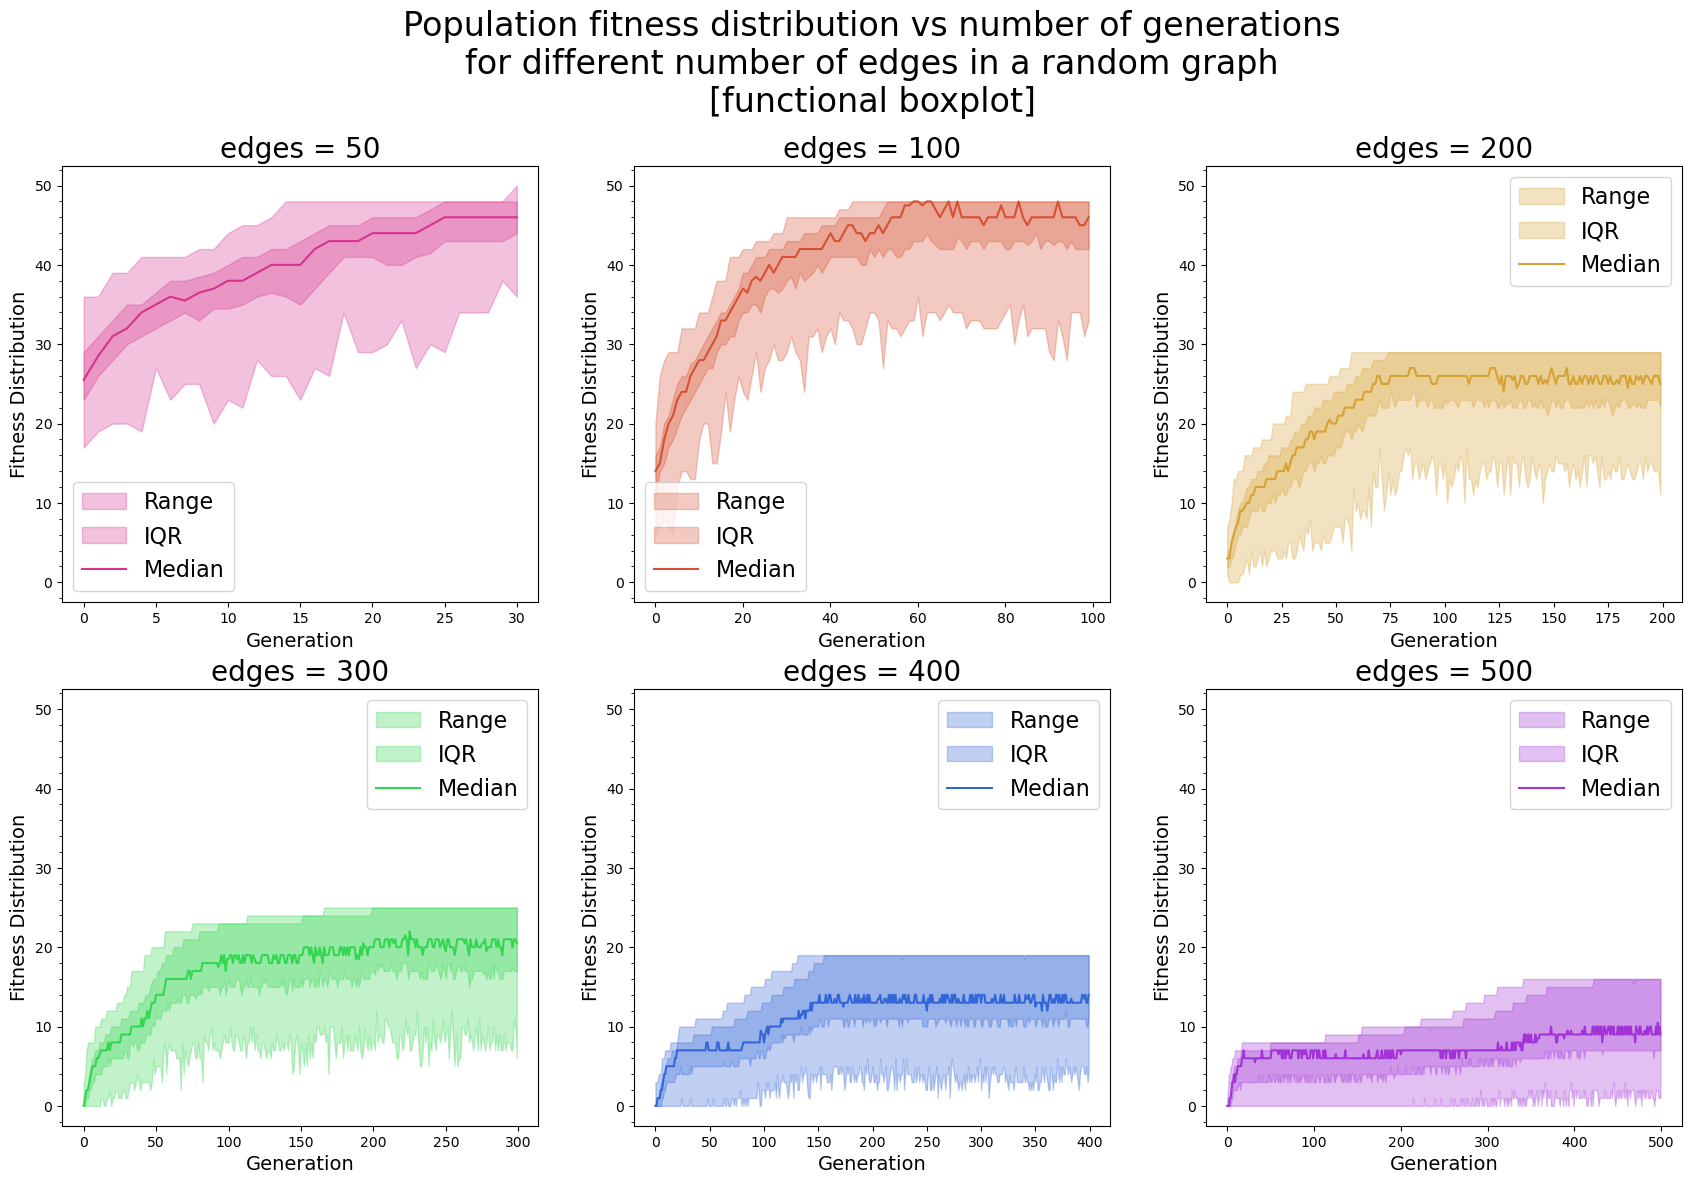

In [710]:
fig3, axs3 = plt.subplots(2,3, sharey=True, sharex=False)
fig3.set_size_inches(18, 12)
fig3.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05)
fig3.suptitle("Population fitness distribution vs number of generations\nfor different number of edges in a random graph\n[functional boxplot]", fontsize=24)
plot_fbox(axs3[0, 0], data2_050e_single, color=colors[0], edges=50)
plot_fbox(axs3[0, 1], data2_100e_single, color=colors[1], edges=100)
plot_fbox(axs3[0, 2], data2_200e_single, color=colors[2], edges=200)
plot_fbox(axs3[1, 0], data2_300e_single, color=colors[3], edges=300)
plot_fbox(axs3[1, 1], data2_400e_single, color=colors[4], edges=400)
plot_fbox(axs3[1, 2], data2_500e_single, color=colors[5], edges=500)
fig3.savefig('plots/03.png')
fig3.show()

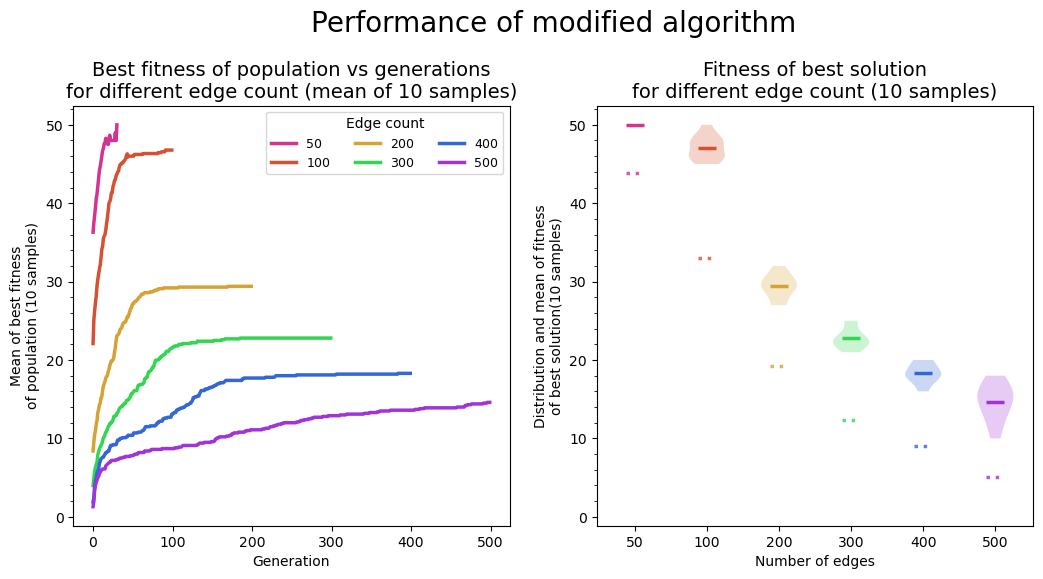

In [711]:
fig4, (ax4_0, ax4_1) = plt.subplots(1, 2, sharey=True)
fig4.set_size_inches(12, 6)
fig4.subplots_adjust(left=0.1, right=0.9, top=0.82, bottom=0.12)
fig4.suptitle("Performance of modified algorithm", fontsize=20)

plot_lines(ax4_0, data2_050e_all_max, edges=50, color=colors[0])
plot_lines(ax4_0, data2_100e_all_max, edges=100, color=colors[1])
plot_lines(ax4_0, data2_200e_all_max, edges=200, color=colors[2])
plot_lines(ax4_0, data2_300e_all_max, edges=300, color=colors[3])
plot_lines(ax4_0, data2_400e_all_max, edges=400, color=colors[4])
plot_lines(ax4_0, data2_500e_all_max, edges=500, color=colors[5])
ax4_0.set_title("Best fitness of population vs generations\nfor different edge count (mean of 10 samples)", fontsize=14)
ax4_0.set_ylabel("Mean of best fitness\nof population (10 samples)")
ax4_0.set_xlabel("Generation")
ax4_0.legend(title="Edge count", ncol=3, fontsize=9, loc="upper right")

plot_violin(ax4_1, [data2_050e_last_max, data2_100e_last_max, data2_200e_last_max, data2_300e_last_max, data2_400e_last_max, data2_500e_last_max])
ax4_1.set_title("Fitness of best solution\nfor different edge count (10 samples)", fontsize=14)
ax4_1.set_ylabel("Distribution and mean of fitness\nof best solution(10 samples)")
ax4_1.set_xlabel('Number of edges')
ax4_1.set_xticks(np.arange(1, 7), labels=['50', '100', '200', '300', '400', '500'])


plot_violin(ax4_1, [data_050e_last_max, data_100e_last_max, data_200e_last_max, data_300e_last_max, data_400e_last_max, data_500e_last_max], compare=True)

fig4.savefig('plots/04.png')
fig4.show()

In [712]:
test = './output/test.csv'
test_new = './output/test_new.csv'

In [713]:
df3 = pd.read_csv(test).reset_index(drop=True)

test_050e_single = df3.loc[df3['id'] == '050:004'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
test_100e_single = df3.loc[df3['id'] == '100:004'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
test_200e_single = df3.loc[df3['id'] == '200:004'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]

test_050e_all_max = df3.loc[df3['id'].str.startswith('050:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
test_100e_all_max = df3.loc[df3['id'].str.startswith('100:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
test_200e_all_max = df3.loc[df3['id'].str.startswith('200:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']

test_050e_last_max = list(df3.loc[df3['id'].str.startswith('050:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
test_100e_last_max = list(df3.loc[df3['id'].str.startswith('100:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
test_200e_last_max = list(df3.loc[df3['id'].str.startswith('200:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])

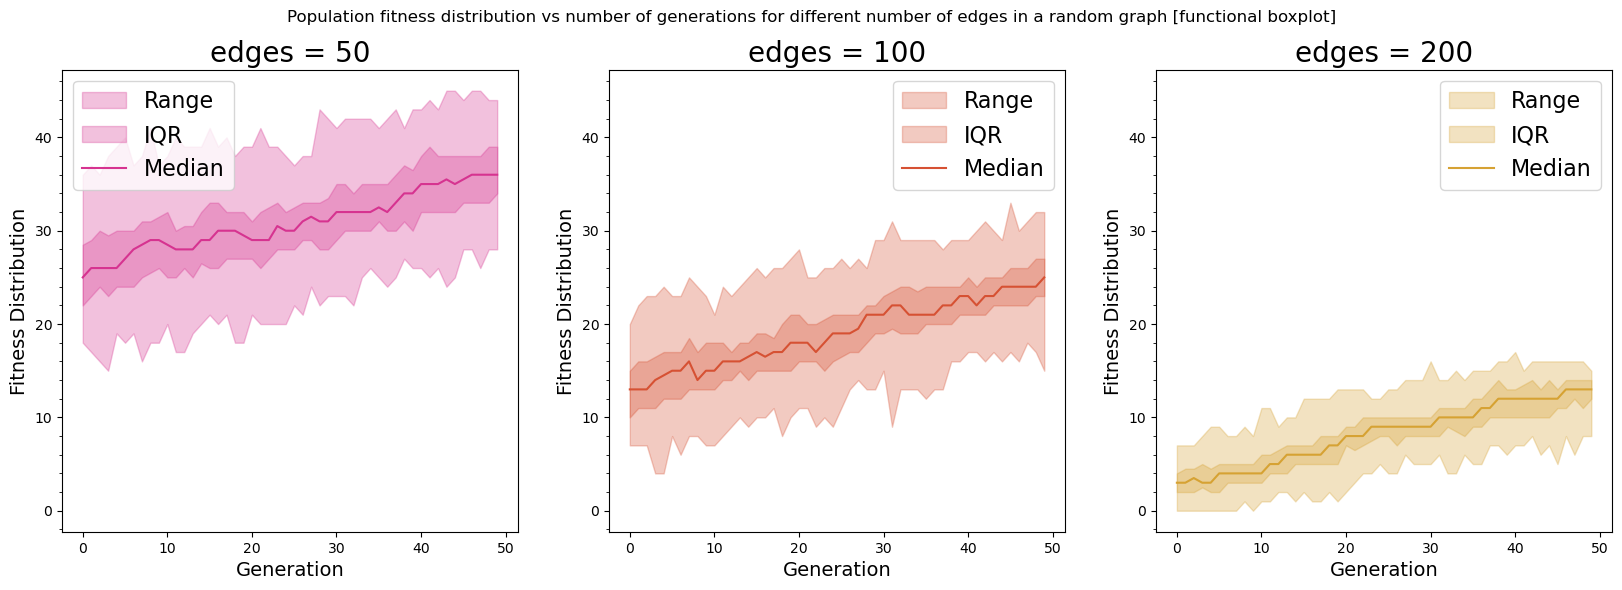

In [714]:
figT1, axsT1 = plt.subplots(1,3, sharey=True, sharex=True)
figT1.set_size_inches(20, 6)
figT1.suptitle("Population fitness distribution vs number of generations for different number of edges in a random graph [functional boxplot]")
plot_fbox(axsT1[0], test_050e_single, color=colors[0], edges=50)
plot_fbox(axsT1[1], test_100e_single, color=colors[1], edges=100)
plot_fbox(axsT1[2], test_200e_single, color=colors[2], edges=200)
figT1.savefig('plots/T1.png')
figT1.show()

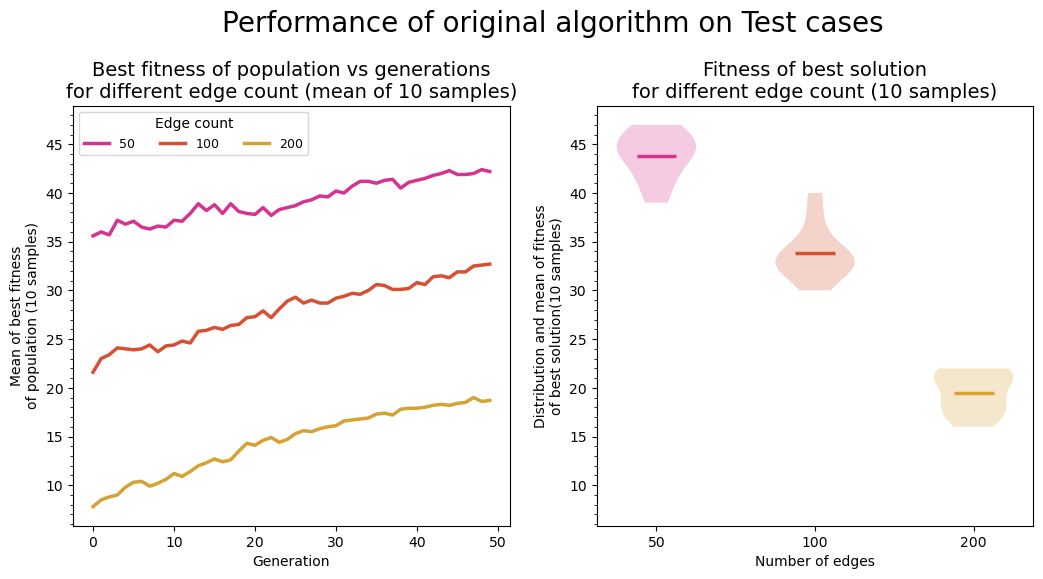

In [715]:
figT2, (axT2_0, axT2_1) = plt.subplots(1, 2, sharey=True)
figT2.set_size_inches(12, 6)
figT2.subplots_adjust(left=0.1, right=0.9, top=0.82, bottom=0.12)
figT2.suptitle("Performance of original algorithm on Test cases", fontsize=20)

plot_lines(axT2_0, test_050e_all_max, edges=50, color=colors[0])
plot_lines(axT2_0, test_100e_all_max, edges=100, color=colors[1])
plot_lines(axT2_0, test_200e_all_max, edges=200, color=colors[2])
axT2_0.set_title("Best fitness of population vs generations\nfor different edge count (mean of 10 samples)", fontsize=14)
axT2_0.set_ylabel("Mean of best fitness\nof population (10 samples)")
axT2_0.set_xlabel("Generation")
axT2_0.legend(title="Edge count", ncol=3, fontsize=9, loc="upper left")

plot_violin(axT2_1, [test_050e_last_max, test_100e_last_max, test_200e_last_max])
axT2_1.set_title("Fitness of best solution\nfor different edge count (10 samples)", fontsize=14)
axT2_1.set_ylabel("Distribution and mean of fitness\nof best solution(10 samples)")
axT2_1.set_xlabel('Number of edges')
axT2_1.set_xticks(np.arange(1, 4), labels=['50', '100', '200'])

figT2.savefig('plots/T2.png')
figT2.show()

In [716]:
df4 = pd.read_csv(test_new).reset_index(drop=True)

test2_050e_single = df4.loc[df4['id'] == '050:002'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
test2_100e_single = df4.loc[df4['id'] == '100:002'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]
test2_200e_single = df4.loc[df4['id'] == '200:002'][['generation', 'fitness.min', 'fitness.l_quartile', 'fitness.median', 'fitness.u_quartile', 'fitness.max']]

test2_050e_all_max = df4.loc[df4['id'].str.startswith('050:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
test2_100e_all_max = df4.loc[df4['id'].str.startswith('100:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']
test2_200e_all_max = df4.loc[df4['id'].str.startswith('200:')][['generation', 'fitness.max']].groupby('generation').mean().reset_index()['fitness.max']

test2_050e_last_max = list(df4.loc[df4['id'].str.startswith('050:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
test2_100e_last_max = list(df4.loc[df4['id'].str.startswith('100:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])
test2_200e_last_max = list(df4.loc[df4['id'].str.startswith('200:')][['generation', 'id', 'fitness.max']].groupby('id').max().reset_index()['fitness.max'])

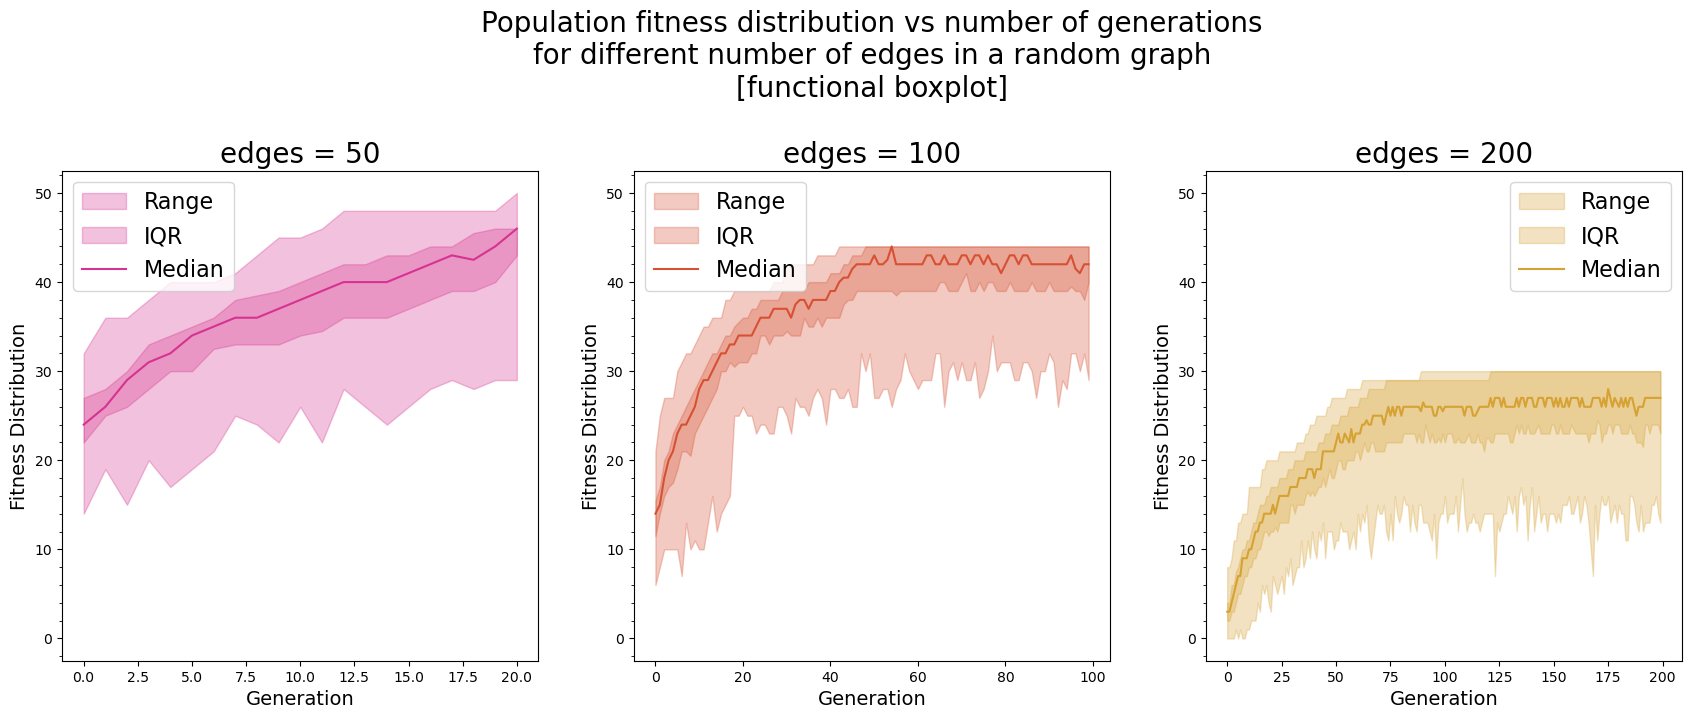

In [717]:
figT3, axsT3 = plt.subplots(1,3, sharey=True, sharex=False)
figT3.set_size_inches(18, 7)
figT3.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.05)
figT3.suptitle("Population fitness distribution vs number of generations\nfor different number of edges in a random graph\n[functional boxplot]", fontsize=20)
plot_fbox(axsT3[0], test2_050e_single, color=colors[0], edges=50)
plot_fbox(axsT3[1], test2_100e_single, color=colors[1], edges=100)
plot_fbox(axsT3[2], test2_200e_single, color=colors[2], edges=200)
figT3.savefig('plots/T3.png')
figT3.show()

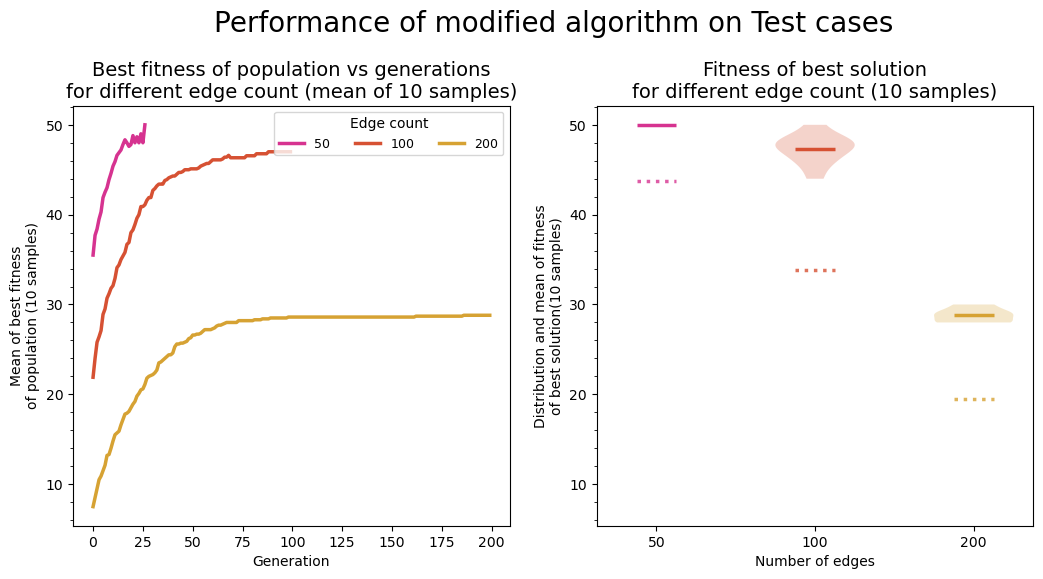

In [718]:
figT4, (axT4_0, axT4_1) = plt.subplots(1, 2, sharey=True)
figT4.set_size_inches(12, 6)
figT4.subplots_adjust(left=0.1, right=0.9, top=0.82, bottom=0.12)
figT4.suptitle("Performance of modified algorithm on Test cases", fontsize=20)

plot_lines(axT4_0, test2_050e_all_max, edges=50, color=colors[0])
plot_lines(axT4_0, test2_100e_all_max, edges=100, color=colors[1])
plot_lines(axT4_0, test2_200e_all_max, edges=200, color=colors[2])
axT4_0.set_title("Best fitness of population vs generations\nfor different edge count (mean of 10 samples)", fontsize=14)
axT4_0.set_ylabel("Mean of best fitness\nof population (10 samples)")
axT4_0.set_xlabel("Generation")
axT4_0.legend(title="Edge count", ncol=3, fontsize=9, loc="upper right")

plot_violin(axT4_1, [test2_050e_last_max, test2_100e_last_max, test2_200e_last_max])
axT4_1.set_title("Fitness of best solution\nfor different edge count (10 samples)", fontsize=14)
axT4_1.set_ylabel("Distribution and mean of fitness\nof best solution(10 samples)")
axT4_1.set_xlabel('Number of edges')
axT4_1.set_xticks(np.arange(1, 4), labels=['50', '100', '200'])


plot_violin(axT4_1, [test_050e_last_max, test_100e_last_max, test_200e_last_max], compare=True)

figT4.savefig('plots/T4.png')
figT4.show()